In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import pandas_datareader as pdr

In [21]:

start = dt.datetime(2022,1,1)
end = dt.datetime.today()

snp = yf.download('^GSPC',start,end)
apl = yf.download('AAPL',start,end)
ggl = yf.download('GOOG',start,end)
tsl = yf.download('TSLA',start,end)
nfx = yf.download('NFLX',start,end)
fb = yf.download('META',start,end)
fid = yf.download('FDGRX',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
apl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100


In [23]:
# Adjusted Close Price

stk = pd.DataFrame({
    'snp': snp['Adj Close'],
    'apl': apl['Adj Close'],
    'ggl': ggl['Adj Close'],
    'tsl': tsl['Adj Close'],
    'nfx': nfx['Adj Close'],
    'fb': fb['Adj Close'],
    'fid': fid['Adj Close']
}).dropna()

In [24]:
stk.head()

,snp,apl,ggl,tsl,nfx,fb,fid
Date,,,,,,,
2022-01-03,4796.560059,180.434296,145.074493,399.926666,597.369995,338.540009,34.432896
2022-01-04,4793.540039,178.144287,144.416504,383.196655,591.150024,336.529999,33.826351
2022-01-05,4700.580078,173.405670,137.653503,362.706665,567.520020,324.170013,32.491962
2022-01-06,4696.049805,170.510971,137.550995,354.899994,553.289978,332.459991,32.510624
2022-01-07,4677.029785,170.679489,137.004501,342.320007,541.059998,331.790009,32.081379


In [25]:
# Calculate the return

s_ret = stk.pct_change()*100
s_ret.columns = ['r_snp', 'r_apl', 'r_ggl', 'r_tsl', 'r_nfx', 'r_fb', 'r_fid']
s_ret

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.062962,-1.269165,-0.453553,-4.183270,-1.041226,-0.593729,-1.761526
2022-01-05,-1.939276,-2.659988,-4.682983,-5.347121,-3.997294,-3.672774,-3.944820
2022-01-06,-0.096377,-1.669322,-0.074469,-2.152337,-2.507408,2.557293,0.057434
2022-01-07,-0.405022,0.098831,-0.397302,-3.544657,-2.210411,-0.201523,-1.320322
...,...,...,...,...,...,...,...
2023-05-22,0.015503,-0.548074,2.125763,4.846228,-0.643195,1.091031,0.252622
2023-05-23,-1.122203,-1.515499,-2.049735,-1.641336,-1.933836,-0.636276,-1.331896
2023-05-24,-0.731860,0.163207,-1.338309,-1.544927,2.488838,1.001054,-0.620212


In [26]:
# Merge (Stock Price & Return)

stock = pd.merge(stk, s_ret, left_index=True, right_index=True, how='inner')
stock

,snp,apl,ggl,tsl,nfx,fb,fid,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,
2022-01-03,4796.560059,180.434296,145.074493,399.926666,597.369995,338.540009,34.432896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,4793.540039,178.144287,144.416504,383.196655,591.150024,336.529999,33.826351,-0.062962,-1.269165,-0.453553,-4.183270,-1.041226,-0.593729,-1.761526
2022-01-05,4700.580078,173.405670,137.653503,362.706665,567.520020,324.170013,32.491962,-1.939276,-2.659988,-4.682983,-5.347121,-3.997294,-3.672774,-3.944820
2022-01-06,4696.049805,170.510971,137.550995,354.899994,553.289978,332.459991,32.510624,-0.096377,-1.669322,-0.074469,-2.152337,-2.507408,2.557293,0.057434
2022-01-07,4677.029785,170.679489,137.004501,342.320007,541.059998,331.790009,32.081379,-0.405022,0.098831,-0.397302,-3.544657,-2.210411,-0.201523,-1.320322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,4192.629883,174.199997,125.870003,188.869995,363.010010,248.320007,27.780001,0.015503,-0.548074,2.125763,4.846228,-0.643195,1.091031,0.252622
2023-05-23,4145.580078,171.559998,123.290001,185.770004,355.989990,246.740005,27.410000,-1.122203,-1.515499,-2.049735,-1.641336,-1.933836,-0.636276,-1.331896
2023-05-24,4115.240234,171.839996,121.639999,182.899994,364.850006,249.210007,27.240000,-0.731860,0.163207,-1.338309,-1.544927,2.488838,1.001054,-0.620212


In [28]:
# Statistics (Random Variable 4 Moment) Mean, Variance, Skewness, Kurtosis

df = s_ret
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

            r_snp       r_apl       r_ggl       r_tsl       r_nfx        r_fb  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean    -0.027867    0.012949   -0.012894   -0.123917   -0.045189    0.004348   
std      1.386888    2.053265    2.393588    4.070241    3.965804    3.879763   
min     -4.323661   -5.867952   -9.634995  -12.242249  -35.116603  -26.390095   
25%     -0.839558   -1.267165   -1.621773   -2.470543   -1.966962   -1.616748   
50%     -0.086763    0.000000   -0.095135    0.042631   -0.278610   -0.075198   
75%      0.920037    1.299757    1.509937    2.234101    1.894784    1.822643   
max      5.543448    8.897452    7.745991   11.000180   13.086442   23.282400   
var      1.923458    4.215898    5.729261   16.566858   15.727604   15.052561   
skew    -0.003859    0.249116    0.105438   -0.131426   -2.042733   -0.619621   
kurt     0.673489    1.377260    1.126286    0.369295   19.372490   14.478821   

            r_fid  
count  

<Axes: xlabel='Date'>

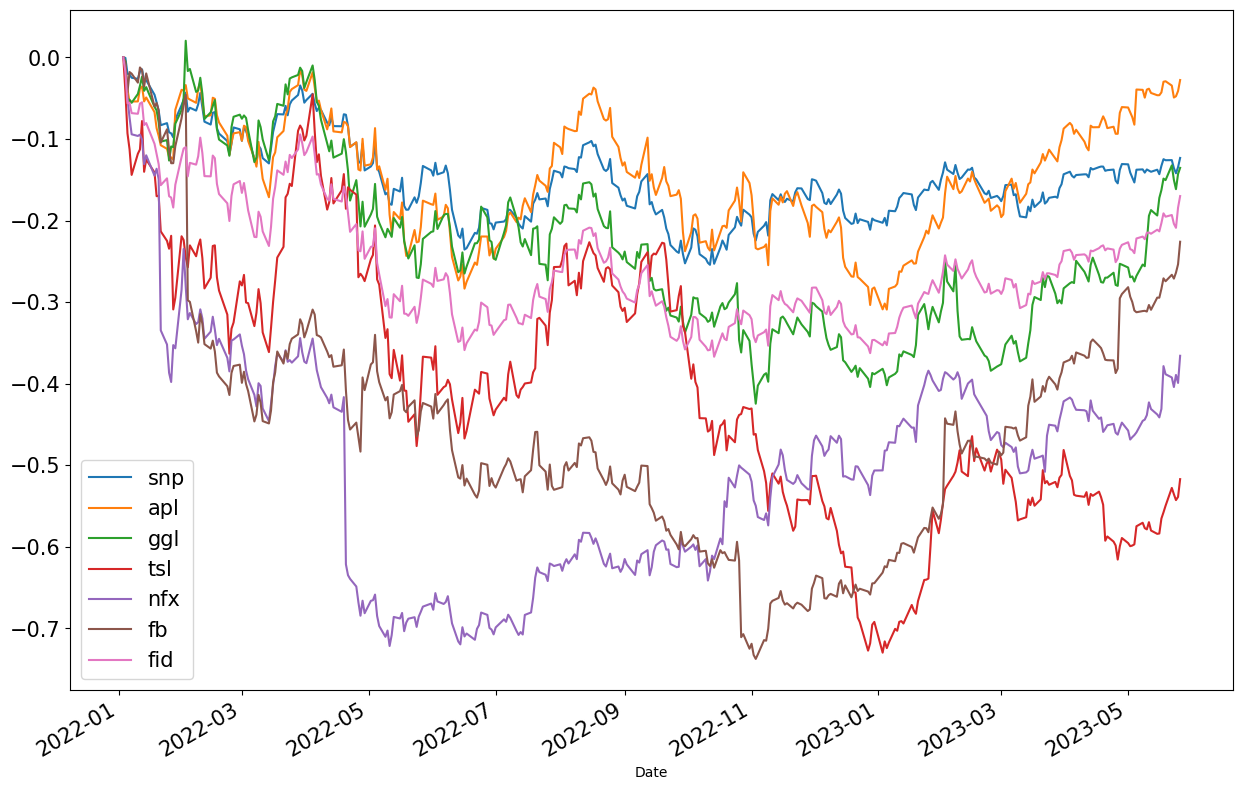

In [30]:
# Visualization : Relative Stock Price

s_pr = stk / stk.iloc[0] - 1.0

plt.rcParams['legend.fontsize'] = 15
s_pr.plot(figsize=(15,10), fontsize=15)

In [35]:
# Resample (Monthly Return Data)

s_retm = s_ret.resample('M').sum()
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2022-01-31,-5.900027,-3.632692,-6.325258,-22.512909,-29.438671,-7.239457,-12.588509
2022-02-28,-3.001722,-5.344993,0.064631,-5.976700,-6.814246,-34.572235,-2.913254
2022-03-31,3.751700,6.031250,3.952435,22.913040,-4.294478,6.273102,4.242208
2022-04-30,-8.957609,-9.756358,-18.786351,-19.600878,-58.515820,-8.008175,-15.072019
2022-05-31,0.395867,-4.619746,-0.127414,-10.645793,5.465054,-2.079563,-3.312224
2022-06-30,-8.401786,-7.882006,-3.493585,-9.689273,-10.519986,-16.752194,-8.445402
2022-07-31,8.877857,17.583484,7.328515,29.429632,26.474105,0.054414,11.624472
2022-08-31,-4.168157,-2.879047,-6.260613,-6.807821,0.175231,3.150593,-3.242632
2022-09-30,-9.555091,-12.315161,-12.247403,-2.947971,6.550203,-17.294817,-10.137718


In [36]:
# Date Format 

s_retm = s_retm.to_period('M')
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2022-01,-5.900027,-3.632692,-6.325258,-22.512909,-29.438671,-7.239457,-12.588509
2022-02,-3.001722,-5.344993,0.064631,-5.976700,-6.814246,-34.572235,-2.913254
2022-03,3.751700,6.031250,3.952435,22.913040,-4.294478,6.273102,4.242208
2022-04,-8.957609,-9.756358,-18.786351,-19.600878,-58.515820,-8.008175,-15.072019
2022-05,0.395867,-4.619746,-0.127414,-10.645793,5.465054,-2.079563,-3.312224
2022-06,-8.401786,-7.882006,-3.493585,-9.689273,-10.519986,-16.752194,-8.445402
2022-07,8.877857,17.583484,7.328515,29.429632,26.474105,0.054414,11.624472
2022-08,-4.168157,-2.879047,-6.260613,-6.807821,0.175231,3.150593,-3.242632
2022-09,-9.555091,-12.315161,-12.247403,-2.947971,6.550203,-17.294817,-10.137718


In [38]:
# Statistics (Monthly Return)

df = s_retm
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

           r_snp      r_apl      r_ggl       r_tsl       r_nfx        r_fb  \
count  17.000000  17.000000  17.000000   17.000000   17.000000   17.000000   
mean   -0.575363   0.267361  -0.266228   -2.558529   -0.933019    0.089773   
std     6.024738   8.981147   9.970464   21.246356   20.251906   17.975737   
min    -9.555091 -12.668651 -18.786351  -43.159377  -58.515820  -34.572235   
25%    -5.900027  -5.344993  -6.325258  -13.622599   -6.814246   -8.008175   
50%     0.395867  -2.476843  -0.127414   -6.807821    0.175231    2.703945   
75%     3.751700   6.031250   7.328515   16.794223    7.841598   13.599856   
max     8.877857  17.583484  15.104044   37.455168   26.474105   25.205899   
var    36.297464  80.661010  99.410144  451.407641  410.139684  323.127138   
skew    0.001484   0.310608  -0.090848    0.287534   -1.424102   -0.546814   
kurt   -1.270701  -0.824232  -0.780117   -0.299593    3.287491   -0.374765   

           r_fid  
count  17.000000  
mean   -0.713797  
std   

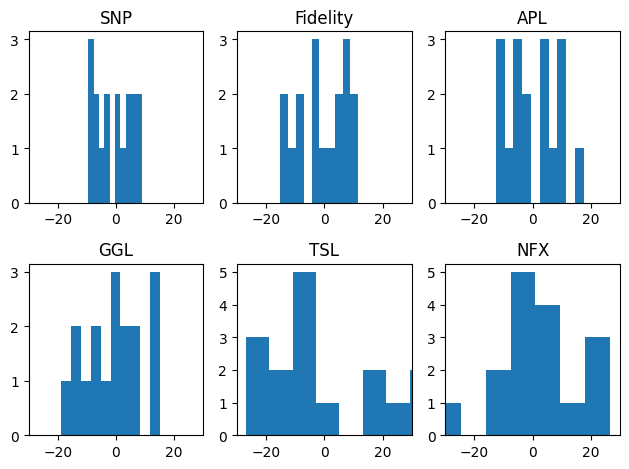

In [45]:
# Histogram (Set fixed y axis scale)

plt.subplot(231)
plt.hist(s_retm['r_snp'])
plt.title('SNP')
plt.xlim(-30, 30)

plt.subplot(232)
plt.hist(s_retm['r_fid'])
plt.title('Fidelity')
plt.xlim(-30, 30)

plt.subplot(233)
plt.hist(s_retm['r_apl'])
plt.title('APL')
plt.xlim(-30, 30)

plt.subplot(234)
plt.hist(s_retm['r_ggl'])
plt.title('GGL')
plt.xlim(-30, 30)

plt.subplot(235)
plt.hist(s_retm['r_tsl'])
plt.title('TSL')
plt.xlim(-30, 30)

plt.subplot(236)
plt.hist(s_retm['r_nfx'])
plt.title('NFX')
plt.xlim(-30, 30)

plt.tight_layout()
plt.show()

# Stock return pricing model

In [60]:
# Fama-French Factor Model - 5 Factor

ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start, end)[0]
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2022-01,-6.25,-4.04,12.75,0.87,7.74,0.00
2022-02,-2.29,2.94,3.08,-2.08,3.12,0.00
2022-03,3.05,-2.16,-1.80,-1.56,3.14,0.01
2022-04,-9.46,-0.41,6.17,3.63,5.89,0.01
2022-05,-0.34,-0.05,8.39,1.44,3.97,0.03
2022-06,-8.43,1.31,-5.98,1.86,-4.70,0.06
2022-07,9.57,1.86,-4.10,0.68,-6.92,0.08
2022-08,-3.77,1.49,0.30,-4.78,1.29,0.19
2022-09,-9.35,-0.97,0.06,-1.51,-0.84,0.19


In [86]:
# 25 Portfolios Formed on Size and Book-to-Market

ffp = pdr.DataReader('25_Portfolios_5x5', 'famafrench', start, end)[0]
ffp.head(5)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01,-16.1987,-14.5487,-10.1133,-3.7386,-1.8599,-16.5134,-11.6045,-9.9115,-5.1276,0.3854,...,-12.7412,-7.0947,-3.8167,-3.1200,5.7604,-7.7567,-6.3384,-1.8314,3.1451,7.1164
2022-02,-1.0684,-1.0570,0.8426,0.5454,2.9932,-0.4173,1.9407,0.4824,3.1727,2.8521,...,0.1072,0.4257,0.6697,1.9486,3.1983,-3.3396,-4.3266,0.2863,0.3162,-1.4022
2022-03,0.5716,1.7594,0.5113,1.2822,2.5969,1.1300,2.2369,1.7319,0.1112,0.0282,...,0.0854,1.1200,3.4072,1.1893,1.6447,4.8700,3.5328,1.6470,4.1316,-2.9349
2022-04,-16.1458,-13.2365,-9.9863,-6.3449,-4.1074,-18.1950,-12.0239,-8.5393,-6.2672,-5.9654,...,-10.7264,-7.7692,-5.0590,-5.6840,-7.0521,-10.8609,-9.2140,-7.1015,-5.5172,-7.4225
2022-05,-5.8265,-3.5601,-0.9777,-0.1506,2.9670,-3.2936,-2.9758,2.0090,4.1218,5.7494,...,-2.9505,1.1225,4.1453,0.8937,8.2899,-3.0113,-0.3170,2.7732,6.4726,6.4003


In [85]:
ff = pd.merge(ff5, ffp, left_index=True, right_index=True, how='inner')
ff.head(5)

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
2022-01,-6.25,-4.04,12.75,0.87,7.74,0.00,-16.1987,-14.5487,-10.1133,-3.7386,...,-12.7412,-7.0947,-3.8167,-3.1200,5.7604,-7.7567,-6.3384,-1.8314,3.1451,7.1164
2022-02,-2.29,2.94,3.08,-2.08,3.12,0.00,-1.0684,-1.0570,0.8426,0.5454,...,0.1072,0.4257,0.6697,1.9486,3.1983,-3.3396,-4.3266,0.2863,0.3162,-1.4022
2022-03,3.05,-2.16,-1.80,-1.56,3.14,0.01,0.5716,1.7594,0.5113,1.2822,...,0.0854,1.1200,3.4072,1.1893,1.6447,4.8700,3.5328,1.6470,4.1316,-2.9349
2022-04,-9.46,-0.41,6.17,3.63,5.89,0.01,-16.1458,-13.2365,-9.9863,-6.3449,...,-10.7264,-7.7692,-5.0590,-5.6840,-7.0521,-10.8609,-9.2140,-7.1015,-5.5172,-7.4225
2022-05,-0.34,-0.05,8.39,1.44,3.97,0.03,-5.8265,-3.5601,-0.9777,-0.1506,...,-2.9505,1.1225,4.1453,0.8937,8.2899,-3.0113,-0.3170,2.7732,6.4726,6.4003


In [63]:
# Statistics : 5 Factors

df = ff5
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

          Mkt-RF        SMB        HML        RMW        CMA         RF
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000
mean   -0.978000  -0.192667   1.052000   0.528000   1.218667   0.164667
std     6.402512   2.896260   5.894632   2.732739   4.452248   0.143968
min    -9.460000  -7.010000  -9.010000  -4.780000  -6.920000   0.000000
25%    -6.330000  -1.565000  -2.925000  -1.535000  -1.850000   0.020000
50%    -2.290000  -0.050000   0.300000   0.870000   3.110000   0.190000
75%     3.825000   1.675000   4.625000   1.890000   4.080000   0.310000
max     9.570000   4.430000  12.750000   6.010000   7.740000   0.360000
var    40.992160   8.388321  34.746689   7.467860  19.822512   0.020727
skew    0.199896  -0.818989   0.327681   0.003215  -0.383282   0.151443
kurt   -1.280961   0.969561  -0.230128   0.210499  -0.924081  -1.797289


In [64]:
# Correlation (Heatmap, Pairplot)
# Finance Market : Covariance, Correlation

ff5.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,0.140980,-0.217942,0.108726,-0.256796,0.269816
SMB,0.140980,1.000000,0.009250,-0.388486,-0.255344,-0.062169
HML,-0.217942,0.009250,1.000000,0.194846,0.849881,-0.434347
RMW,0.108726,-0.388486,0.194846,1.000000,0.233266,0.052568
CMA,-0.256796,-0.255344,0.849881,0.233266,1.000000,-0.295965
RF,0.269816,-0.062169,-0.434347,0.052568,-0.295965,1.000000


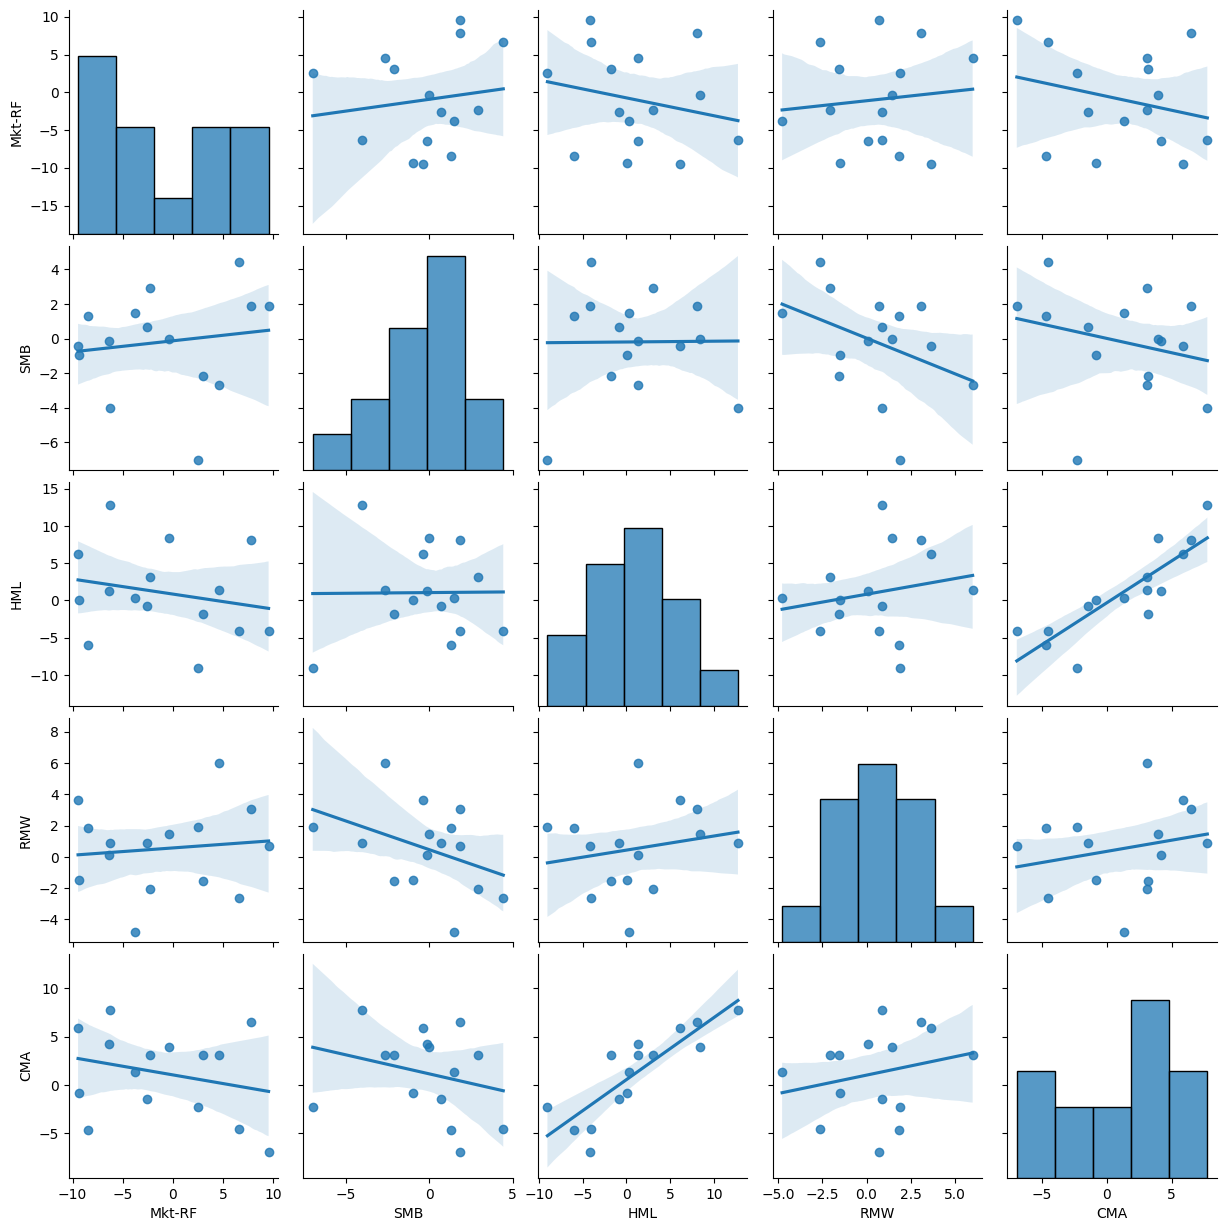

In [66]:
# Correlation (Pairplot: Scatter Matrics) 

sns.pairplot(data=ff, vars=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], kind='reg')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing fro

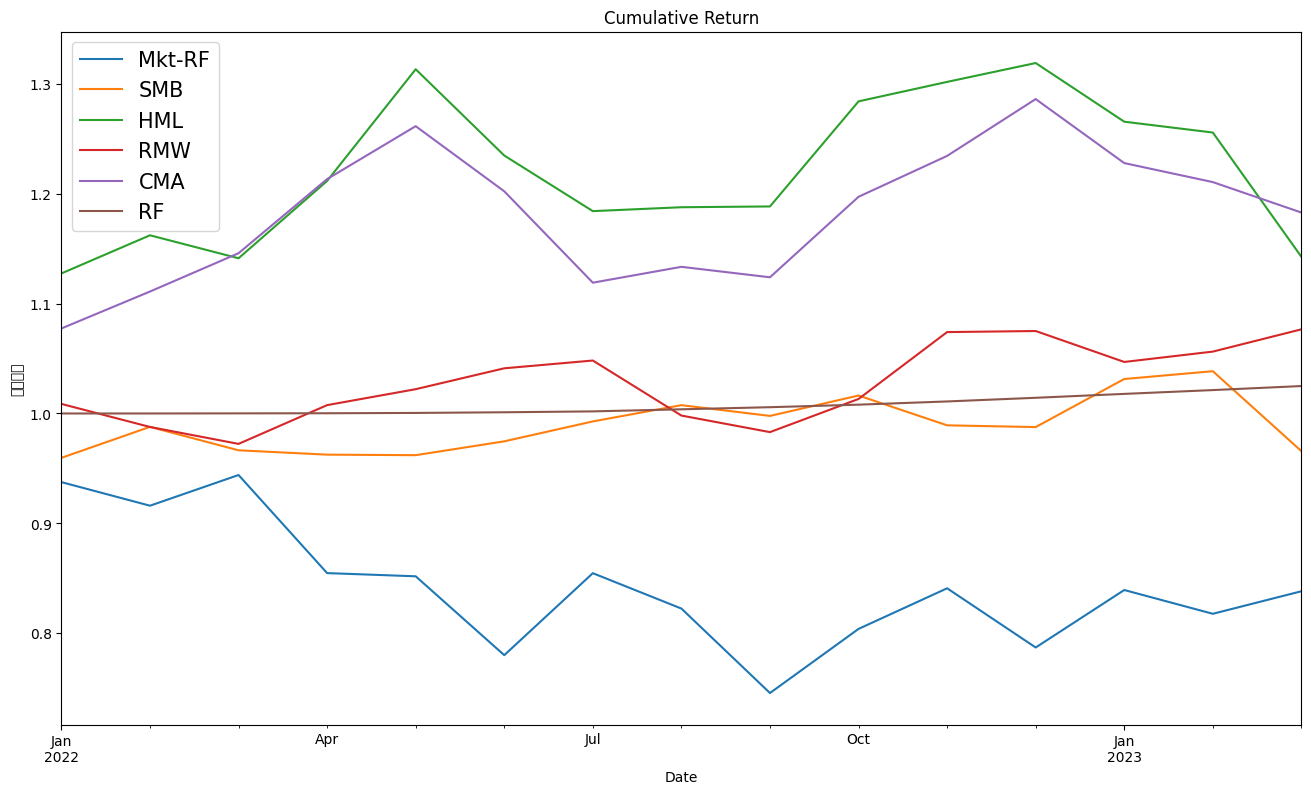

In [68]:
# Cumulative Return graph

ff5_cumr = (1 + ff5 / 100).cumprod()
ff5_cumr

ff5_cumr.plot(figsize=(16,9))
plt.title('Cumulative Return')
plt.xlabel('Date')
plt.ylabel('누적수익')
plt.legend();

In [89]:
# Merge

df = pd.merge(ff, s_retm, left_index= True, right_index=True, how='inner')
df.head(5)

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME5 BM3,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,,,,,,,,
2022-01,-6.25,-4.04,12.75,0.87,7.74,0.00,-16.1987,-14.5487,-10.1133,-3.7386,...,-1.8314,3.1451,7.1164,-5.900027,-3.632692,-6.325258,-22.512909,-29.438671,-7.239457,-12.588509
2022-02,-2.29,2.94,3.08,-2.08,3.12,0.00,-1.0684,-1.0570,0.8426,0.5454,...,0.2863,0.3162,-1.4022,-3.001722,-5.344993,0.064631,-5.976700,-6.814246,-34.572235,-2.913254
2022-03,3.05,-2.16,-1.80,-1.56,3.14,0.01,0.5716,1.7594,0.5113,1.2822,...,1.6470,4.1316,-2.9349,3.751700,6.031250,3.952435,22.913040,-4.294478,6.273102,4.242208
2022-04,-9.46,-0.41,6.17,3.63,5.89,0.01,-16.1458,-13.2365,-9.9863,-6.3449,...,-7.1015,-5.5172,-7.4225,-8.957609,-9.756358,-18.786351,-19.600878,-58.515820,-8.008175,-15.072019
2022-05,-0.34,-0.05,8.39,1.44,3.97,0.03,-5.8265,-3.5601,-0.9777,-0.1506,...,2.7732,6.4726,6.4003,0.395867,-4.619746,-0.127414,-10.645793,5.465054,-2.079563,-3.312224


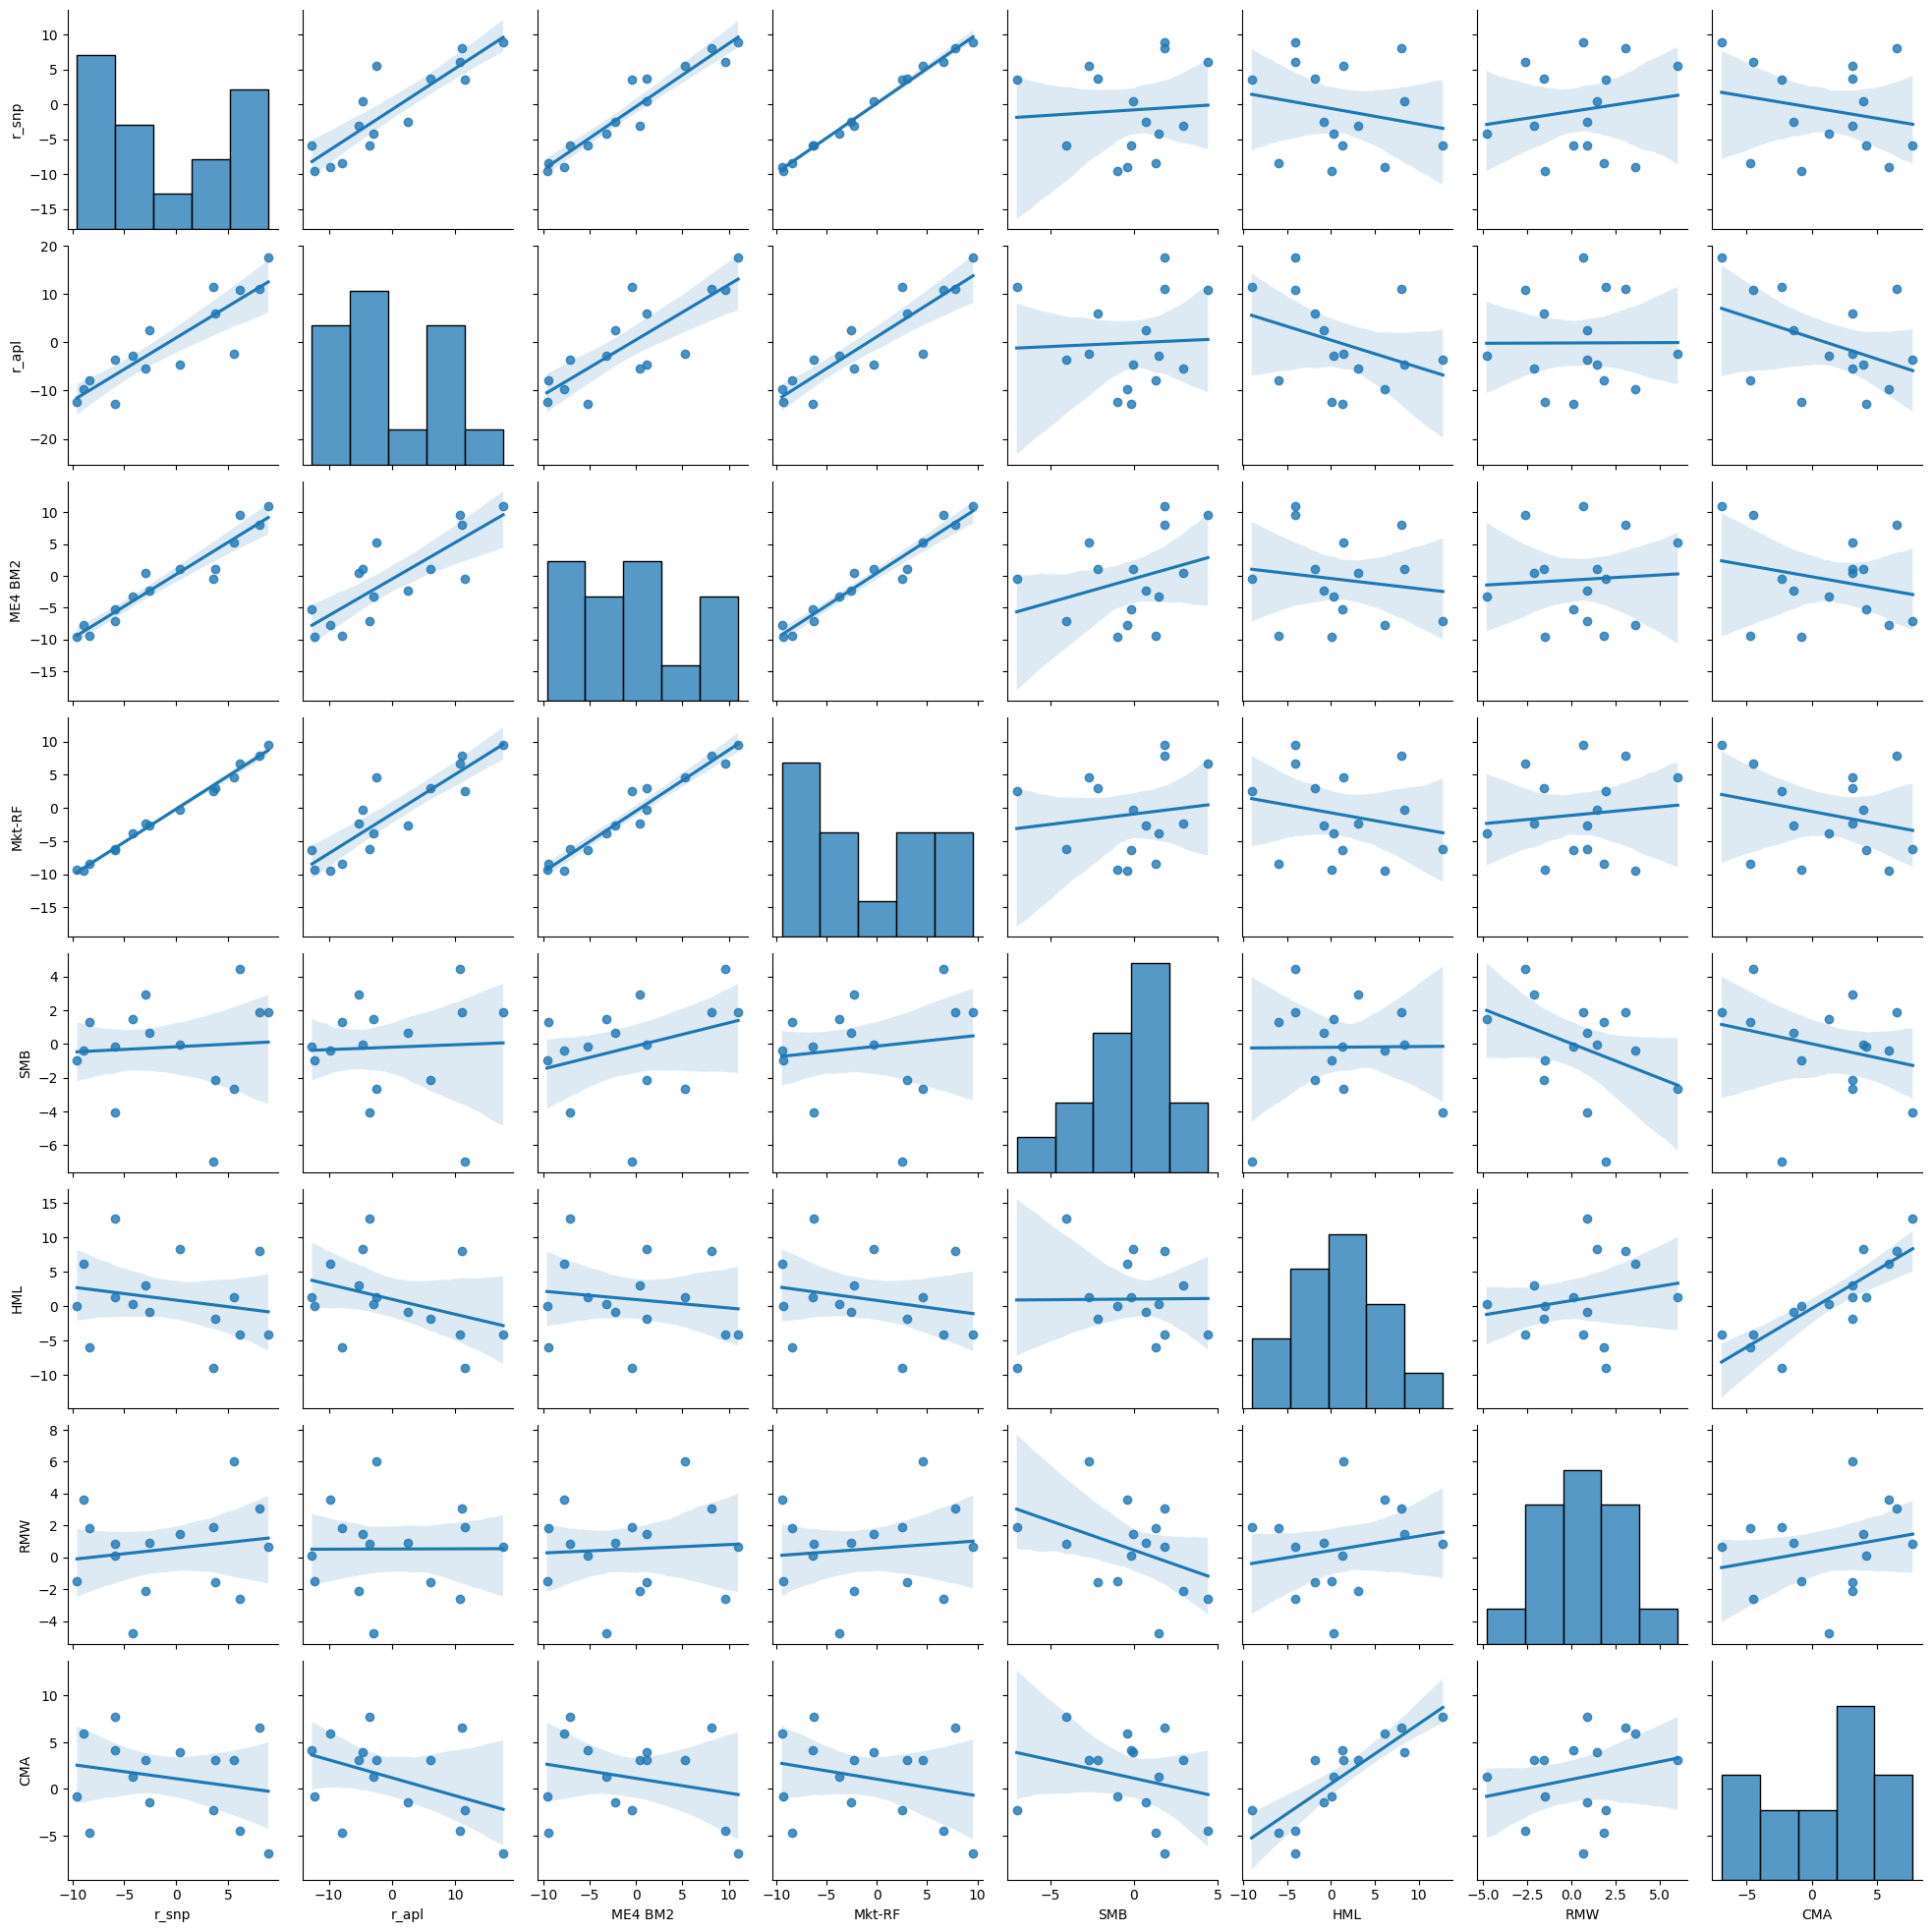

In [71]:
# Correlation (Pairplot: Scatter Matrics)

sns.pairplot(data = df, vars=['r_snp', 'r_apl', 'ME4 BM2', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'],
             kind='reg')

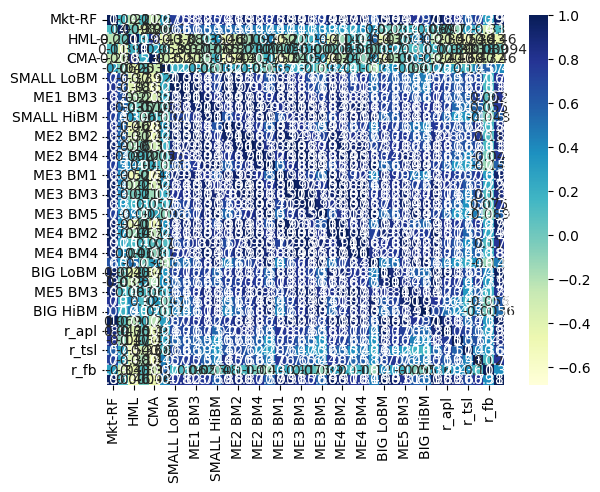

In [75]:
# Correlation (Heatmap)

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

Regression Analysis

In [80]:
df['r_snp_rf'] = df.r_snp - df.RF
df.head(5)

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,...,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid,r_snp_rf
Date,,,,,,,,,,,,,,,,,,,,,
2022-01,-6.25,-4.04,12.75,0.87,7.74,0.00,-16.1987,-14.5487,-10.1133,-3.7386,...,3.1451,7.1164,-5.900027,-3.632692,-6.325258,-22.512909,-29.438671,-7.239457,-12.588509,-5.900027
2022-02,-2.29,2.94,3.08,-2.08,3.12,0.00,-1.0684,-1.0570,0.8426,0.5454,...,0.3162,-1.4022,-3.001722,-5.344993,0.064631,-5.976700,-6.814246,-34.572235,-2.913254,-3.001722
2022-03,3.05,-2.16,-1.80,-1.56,3.14,0.01,0.5716,1.7594,0.5113,1.2822,...,4.1316,-2.9349,3.751700,6.031250,3.952435,22.913040,-4.294478,6.273102,4.242208,3.741700
2022-04,-9.46,-0.41,6.17,3.63,5.89,0.01,-16.1458,-13.2365,-9.9863,-6.3449,...,-5.5172,-7.4225,-8.957609,-9.756358,-18.786351,-19.600878,-58.515820,-8.008175,-15.072019,-8.967609
2022-05,-0.34,-0.05,8.39,1.44,3.97,0.03,-5.8265,-3.5601,-0.9777,-0.1506,...,6.4726,6.4003,0.395867,-4.619746,-0.127414,-10.645793,5.465054,-2.079563,-3.312224,0.365867


In [79]:
y = df['r_snp_rf']
x = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)
x

,const,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2022-01,1.0,-6.25,-4.04,12.75,0.87,7.74
2022-02,1.0,-2.29,2.94,3.08,-2.08,3.12
2022-03,1.0,3.05,-2.16,-1.80,-1.56,3.14
2022-04,1.0,-9.46,-0.41,6.17,3.63,5.89
2022-05,1.0,-0.34,-0.05,8.39,1.44,3.97
2022-06,1.0,-8.43,1.31,-5.98,1.86,-4.70
2022-07,1.0,9.57,1.86,-4.10,0.68,-6.92
2022-08,1.0,-3.77,1.49,0.30,-4.78,1.29
2022-09,1.0,-9.35,-0.97,0.06,-1.51,-0.84


In [81]:
# OLS

olsreg = sm.OLS(y, x)
result = olsreg.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               r_snp_rf   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1057.
Date:                Mon, 29 May 2023   Prob (F-statistic):           3.55e-12
Time:                        07:34:24   Log-Likelihood:               -0.68682
No. Observations:                  15   AIC:                             13.37
Df Residuals:                       9   BIC:                             17.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1183      0.090     -1.310      0.223      -0.323       0.086
Mkt-RF         0.9991      0.015     68.510      0.000       0.966       1.032
SMB           -0.0981      0.038     -2.556      0.031      -0.185      -0.011
HML           -0.0321      0.032     -1.001      0.343      -0.104       0.040
RMW            0.0744      0.037      2.027      0.073      -0.009       0.157
CMA            0.0757      0.043      1.751      0.114      -0.022       0.174
==============================================================================
Omnibus:                        9.700   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.058
Skew:                           1.431   Prob(JB):                       0.0484
Kurtosis:                       4.228   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# CAPM, FF 3 Factor, FF 5Factor Model

def FFReg(df_stk):
  import pandas_datareader.data as web
  import statsmodels.formula.api as sm
  from statsmodels.iolib.summary2 import summary_col

  df_factors = pdr.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')[0]
  df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
  df_factors ['MKT'] = df_factors['MKT']
  df_factors ['SMB'] = df_factors['SMB']
  df_factors ['HML'] = df_factors['HML']
  df_factors ['RMW'] = df_factors['RMW']
  df_factors ['CMA'] = df_factors['CMA']

  df_stock_factor = pd.merge(df_stk, df_factors, left_index=True, right_index=True)
  df_stock_factor['XRet'] = df_stock_factor['Returns'] - df_stock_factor['RF']

  CAPM = sm.ols(formula = 'XRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC', cov_kwds={'maxlags':1})
  FF3 = sm.ols(formula = 'XRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC', cov_kwds={'maxlags':1})
  FF5 = sm.ols(formula = 'XRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC', cov_kwds={'maxlags':1})

  CAPMstat = CAPM.tvalues
  FF3stat = FF3.tvalues
  FF5stat = FF5.tvalues

  CAPMcoeff = CAPM.params
  FF3coeff = FF3.params
  FF5coeff = FF5.params

  results_df = pd.DataFrame({'CAPMcoeff': CAPMcoeff, 'CAPMstat': CAPMstat,
                            'FF3coeff': FF3coeff, 'FF3stat': FF3stat,
                            'FF5coeff': FF5coeff, 'FF5stat': FF5stat},
  index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])                         

  dfoutput = summary_col([CAPM, FF3, FF5], stars=True, float_format= '%0.3f',
                              model_names = ['CAPM', 'FF3', 'FF5'],
                              info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)),
                                           'Adjusted R^2': lambda x: "{:.3f}".format(x.rsquared_adj)},
                                           regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])
  print(dfoutput)

  return results_df

In [107]:
  df['Returns'] = df.r_snp
  df_1 = df[['Returns']]
  FFReg(df_1)


                 CAPM      FF3       FF5   
-------------------------------------------
Intercept      -0.011   -0.053    -0.053   
               (0.162)  (0.092)   (0.092)  
MKT            0.989*** 1.004***  1.004*** 
               (0.020)  (0.015)   (0.015)  
SMB                     -0.158*** -0.158***
                        (0.023)   (0.023)  
HML                     0.025     0.025    
                        (0.017)   (0.017)  
R-squared      0.992    0.997     0.997    
R-squared Adj. 0.991    0.996     0.996    
N              15       15        15       
Adjusted R^2   0.991    0.996     0.996    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMstat,FF3coeff,FF3stat,FF5coeff,FF5stat
Intercept,-0.011267,-0.069425,-0.052996,-0.574831,-0.052996,-0.574831
MKT,0.989257,48.774261,1.004282,69.013190,1.004282,69.013190
SMB,NaN,NaN,-0.157737,-7.006623,-0.157737,-7.006623
HML,NaN,NaN,0.024745,1.488070,0.024745,1.488070
RMW,NaN,NaN,NaN,NaN,NaN,NaN
CMA,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Apple

df['Returns'] = df.r_apl
df_1 = df[['Returns']]
FFReg(df_1)


                 CAPM     FF3      FF5   
-----------------------------------------
Intercept      0.979    1.166    1.166   
               (1.299)  (1.072)  (1.072) 
MKT            1.312*** 1.276*** 1.276***
               (0.122)  (0.123)  (0.123) 
SMB                     -0.234   -0.234  
                        (0.372)  (0.372) 
HML                     -0.254   -0.254  
                        (0.160)  (0.160) 
R-squared      0.784    0.814    0.814   
R-squared Adj. 0.767    0.763    0.763   
N              15       15       15      
Adjusted R^2   0.767    0.763    0.763   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMstat,FF3coeff,FF3stat,FF5coeff,FF5stat
Intercept,0.979290,0.754106,1.166297,1.087923,1.166297,1.087923
MKT,1.312197,10.771575,1.276120,10.386016,1.276120,10.386016
SMB,NaN,NaN,-0.233888,-0.628508,-0.233888,-0.628508
HML,NaN,NaN,-0.254138,-1.587902,-0.254138,-1.587902
RMW,NaN,NaN,NaN,NaN,NaN,NaN
CMA,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# TSLA (요인모형으로 설명되지 않는 부분이 많음)

df['Returns'] = df.r_tsl
df_1 = df[['Returns']]
FFReg(df_1)


                 CAPM     FF3       FF5   
------------------------------------------
Intercept      -0.826  0.754     0.754    
               (5.108) (3.598)   (3.598)  
MKT            1.923** 1.499**   1.499**  
               (0.864) (0.657)   (0.657)  
SMB                    1.624*    1.624*   
                       (0.962)   (0.962)  
HML                    -1.599*** -1.599***
                       (0.547)   (0.547)  
R-squared      0.329   0.552     0.552    
R-squared Adj. 0.277   0.429     0.429    
N              15      15        15       
Adjusted R^2   0.277   0.429     0.429    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMstat,FF3coeff,FF3stat,FF5coeff,FF5stat
Intercept,-0.826403,-0.161799,0.753615,0.209467,0.753615,0.209467
MKT,1.923031,2.225857,1.498597,2.282059,1.498597,2.282059
SMB,NaN,NaN,1.624203,1.687672,1.624203,1.687672
HML,NaN,NaN,-1.599035,-2.925528,-1.599035,-2.925528
RMW,NaN,NaN,NaN,NaN,NaN,NaN
CMA,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Small & LOBM : 포트폴리오 수익률은 요인들로 잘 설명됨

df['Returns'] = df['SMALL LoBM']
df_1 = df[['Returns']]
FFReg(df_1)


                 CAPM      FF3       FF5   
-------------------------------------------
Intercept      -2.064   -1.479**  -1.479** 
               (1.915)  (0.710)   (0.710)  
MKT            1.154*** 0.952***  0.952*** 
               (0.231)  (0.118)   (0.118)  
SMB                     1.939***  1.939*** 
                        (0.238)   (0.238)  
HML                     -0.389*** -0.389***
                        (0.127)   (0.127)  
R-squared      0.560    0.918     0.918    
R-squared Adj. 0.526    0.896     0.896    
N              15       15        15       
Adjusted R^2   0.526    0.896     0.896    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMstat,FF3coeff,FF3stat,FF5coeff,FF5stat
Intercept,-2.064194,-1.077660,-1.478781,-2.081437,-1.478781,-2.081437
MKT,1.153898,4.996245,0.952228,8.066236,0.952228,8.066236
SMB,NaN,NaN,1.938587,8.129664,1.938587,8.129664
HML,NaN,NaN,-0.388921,-3.051634,-0.388921,-3.051634
RMW,NaN,NaN,NaN,NaN,NaN,NaN
CMA,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Big HiBM(대형주) : SMB(규모 요인)이 통계적으로 유의하지 않음

df['Returns'] = df['BIG HiBM']
df_1 = df[['Returns']]
FFReg(df_1)


                 CAPM     FF3      FF5   
-----------------------------------------
Intercept      0.338    -0.360   -0.360  
               (1.311)  (0.506)  (0.506) 
MKT            0.796*** 0.955*** 0.955***
               (0.185)  (0.060)  (0.060) 
SMB                     0.161    0.161   
                        (0.177)  (0.177) 
HML                     0.840*** 0.840***
                        (0.089)  (0.089) 
R-squared      0.487    0.932    0.932   
R-squared Adj. 0.448    0.913    0.913   
N              15       15       15      
Adjusted R^2   0.448    0.913    0.913   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMstat,FF3coeff,FF3stat,FF5coeff,FF5stat
Intercept,0.337868,0.257640,-0.359589,-0.710524,-0.359589,-0.710524
MKT,0.796456,4.293688,0.954631,15.937685,0.954631,15.937685
SMB,NaN,NaN,0.161355,0.912196,0.161355,0.912196
HML,NaN,NaN,0.839581,9.397952,0.839581,9.397952
RMW,NaN,NaN,NaN,NaN,NaN,NaN
CMA,NaN,NaN,NaN,NaN,NaN,NaN
